In [6]:
landa = 10
nu = 12
#La probabilidad de hallar el sistema ocupado o utilización del sistema:
𝑝=landa/nu
#La probabilidad de que no haya unidades en el sistema este vacía u ocioso :
𝑃o = 1.0 - (landa/nu)
#Longitud esperada en cola, promedio de unidades en la línea de espera:
𝐿𝑞 = landa*landa / (nu * (nu - landa))
#/ (nu * (nu - landa))
# Número esperado de clientes en el sistema(cola y servicio) :
𝐿 = landa /(nu - landa)
#El tiempo promedio que una unidad pasa en el sistema:
𝑊 = 1 / (nu - landa)
#Tiempo de espera en cola:
𝑊𝑞 = W - (1.0 / nu)
print (Wq)
#La probabilidad de que haya n unidades en el sistema:
n= 1
𝑃𝑛 = (landa/nu)*𝑛*𝑃o

0.4166666666666667


In [7]:
print ("landa:",round(landa,3))
print ( "nu: ",nu)
print ( "Po: ",round(Po,3))
print ( "Lq: ",round(Lq,3))
print ("L: ",round(L,1))
print ("W: " ,round(W,3))
print ("Wq:",round(Wq,3))
print ("Pn:",round(Pn,3))

landa: 10
nu:  12
Po:  0.167
Lq:  4.167
L:  5.0
W:  0.5
Wq: 0.417
Pn: 0.139


In [8]:
# Simulación
import math, random
import pandas as pd
import numpy as np
import matplotlib as plt
i = 0
# Landa y nu ya definidos
# Atributos del DataFrame
"""
ALL # ALEATORIO DE LLEGADA DE CLIENTES
ASE # ALEATORIO DE SERVICIO
TILL TIEMPO ENTRE LLEGADA
TISE TIEMPO DE SERVICIO
TIRLL TIEMPO REAL DE LLEGADA
TIISE TIEMPO DE INICIO DE SERVICIO
TIFSE TIEMPO FINAL DE SERVICIO
TIESP TIEMPO DE ESPERA
TIESA TIEMPO DE SALIDA
numClientes NUMERO DE CLIENTES
dfLE DATAFRAME DE LA LINEA DE ESPERA
"""
numClientes=100
i = 0
indice = ['ALL','ASE','TILL','TISE','TIRLL','TIISE','TIFSE','TIESP','TIESA']
Clientes = np.arange(numClientes)
dfLE = pd.DataFrame(index=Clientes, columns=indice).fillna(0.000)
np.random.seed(100)
for i in Clientes:
    if i == 0:
        dfLE['ALL'][i] = random.random()
        dfLE['ASE'][i] = random.random()
        dfLE['TILL'][i] = -1/landa*np.log(dfLE['ALL'][i])
        dfLE['TISE'][i] = -1/nu*np.log(dfLE['ASE'][i])
        dfLE['TIRLL'][i] = dfLE['TILL'][i]
        dfLE['TIISE'][i] = dfLE['TIRLL'][i]
        dfLE['TIFSE'][i] = dfLE['TIISE'][i] + dfLE['TISE'][i]
        dfLE['TIESA'][i] = dfLE['TIESP'][i] + dfLE['TISE'][i]
    else:
        dfLE['ALL'][i] = random.random()
        dfLE['ASE'][i] = random.random()
        dfLE['TILL'][i] = -1/landa*np.log(dfLE['ALL'][i])
        dfLE['TISE'][i] = -1/nu*np.log(dfLE['ASE'][i])
        dfLE['TIRLL'][i] = dfLE['TILL'][i] + dfLE['TIRLL'][i-1]
        dfLE['TIISE'][i] = max(dfLE['TIRLL'][i],dfLE['TIFSE'][i-1])
        dfLE['TIFSE'][i] = dfLE['TIISE'][i] + dfLE['TISE'][i]
        dfLE['TIESP'][i] = dfLE['TIISE'][i] - dfLE['TIRLL'][i]
        dfLE['TIESA'][i] = dfLE['TIESP'][i] + dfLE['TISE'][i]
nuevas_columnas = pd.core.indexes.base.Index(["A_LLEGADA","A_SERVICIO","TIE_LLEGADA","TIE_SERVICIO","TIE_EXACTO_LLEGADA","TIE_INI_SERVICIO", "TIE_FIN_SERVICIO","TIE_ESPERA","TIE_EN_SISTEMA"])
dfLE.columns = nuevas_columnas
dfLE


A_LLEGADA  A_SERVICIO  TIE_LLEGADA  TIE_SERVICIO  TIE_EXACTO_LLEGADA  \
0    0.210765    0.815732     0.155701      0.016972            0.155701   
1    0.877174    0.215105     0.013105      0.128052            0.168806   
2    0.101055    0.420415     0.229209      0.072209            0.398015   
3    0.870930    0.762116     0.013819      0.022638            0.411835   
4    0.173024    0.876920     0.175432      0.010945            0.587267   
..        ...         ...          ...           ...                 ...   
95   0.329834    0.161720     0.110917      0.151824            9.479837   
96   0.215182    0.164148     0.153627      0.150582            9.633464   
97   0.117492    0.991464     0.214139      0.000714            9.847602   
98   0.154625    0.425887     0.186675      0.071132           10.034277   
99   0.227143    0.579303     0.148217      0.045494           10.182495   

    TIE_INI_SERVICIO  TIE_FIN_SERVICIO  TIE_ESPERA  TIE_EN_SISTEMA  
0           0.155701          0.172674    0.000000        0.016972  
1           0.172674          0.300726    0.003867        0.131920  
2           0.398015          0.470225    0.000000        0.072209  
3           0.470225          0.492863    0.058390        0.081028  
4           0.587267          0.598212    0.000000        0.010945  
..               ...               ...         ...             ...  
95          9.494060          9.645884    0.014223        0.166047  
96          9.645884          9.796466    0.012420        0.163002  
97          9.847602          9.848317    0.000000        0.000714  
98         10.034277         10.105409    0.000000        0.071132  
99         10.182495         10.227989    0.000000        0.045494  

[100 rows x 9 columns]

<AxesSubplot:>

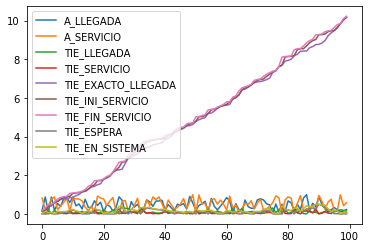

In [9]:
dfLE.plot()

In [10]:
dfLE.describe()


A_LLEGADA  A_SERVICIO  TIE_LLEGADA  TIE_SERVICIO  TIE_EXACTO_LLEGADA  \
count  100.000000  100.000000   100.000000    100.000000          100.000000   
mean     0.448209    0.513148     0.101825      0.078523            4.827065   
std      0.250579    0.285374     0.073932      0.077344            2.889376   
min      0.044228    0.006202     0.000065      0.000255            0.155701   
25%      0.223288    0.245746     0.041876      0.022459            2.275681   
50%      0.445949    0.519035     0.080757      0.054655            4.709606   
75%      0.657871    0.763760     0.149933      0.116970            7.105008   
max      0.999348    0.996947     0.311840      0.423573           10.182495   

       TIE_INI_SERVICIO  TIE_FIN_SERVICIO  TIE_ESPERA  TIE_EN_SISTEMA  
count        100.000000        100.000000  100.000000      100.000000  
mean           4.925852          5.004376    0.098787        0.177310  
std            2.914535          2.921498    0.109136        0.119028  
min            0.155701          0.172674    0.000000        0.000714  
25%            2.379448          2.606530    0.000000        0.099012  
50%            4.744607          4.864190    0.073597        0.150461  
75%            7.257589          7.326768    0.157583        0.238760  
max           10.182495         10.227989    0.499139        0.510386